In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [4]:
# Load csv file 
all_df = pd.read_csv('./train.csv', index_col=False)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# drop ID column
all_df.drop('PassengerId',axis=1,inplace=True)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Use info() to get description of data
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
# basic statistics for each column
all_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
all_df["Cabin"].value_counts()# looks at Cabin data 

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
B79            1
D7             1
C118           1
D11            1
E38            1
Name: Cabin, Length: 147, dtype: int64

In [12]:
# check distribution of Survived data
all_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

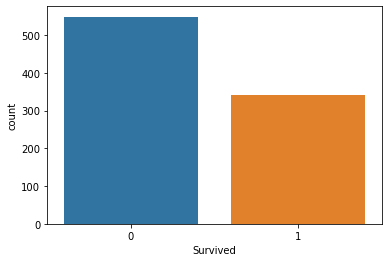

In [13]:
# draw a bar chart for each label
sns.countplot(x="Survived", data=all_df)

In [14]:
# check distribution of Age data
all_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [28]:
# check distribution of Ticket data
all_df['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
347088        6
3101295       6
             ..
112058        1
A.5. 11206    1
2672          1
376566        1
113056        1
Name: Ticket, Length: 681, dtype: int64

In [31]:
# check distribution of embarked data
all_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

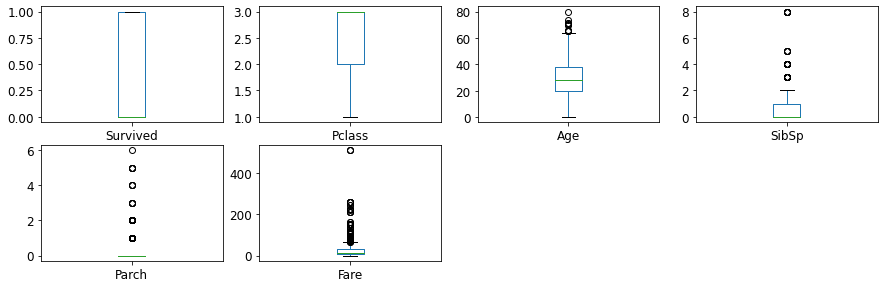

In [15]:
# Use box plot to check the value range and outliers of each feature
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, fontsize=12, figsize=(15,20));

<AxesSubplot:>

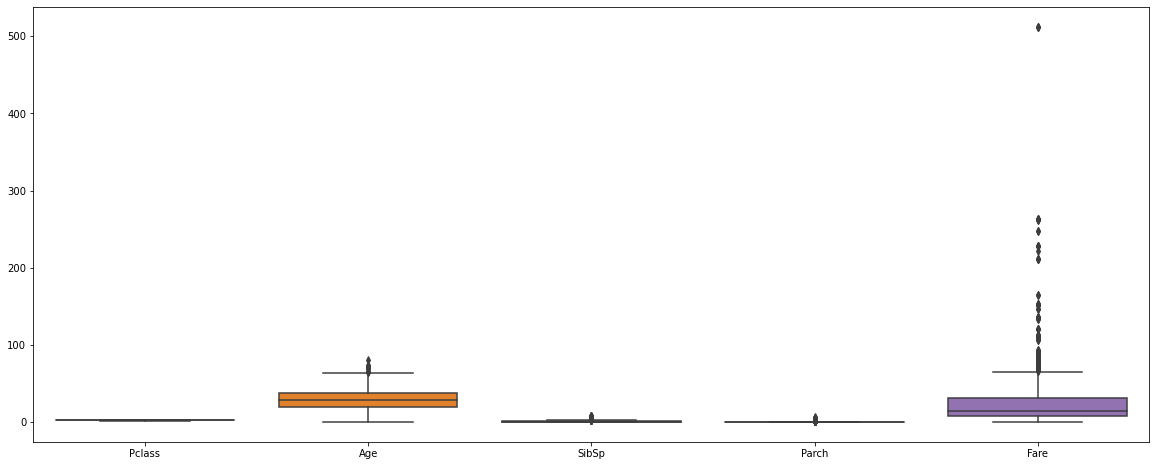

In [16]:
# Compare the features data ranges
# Only for the first 10 features 
fig, ax= plt.subplots(1, figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)

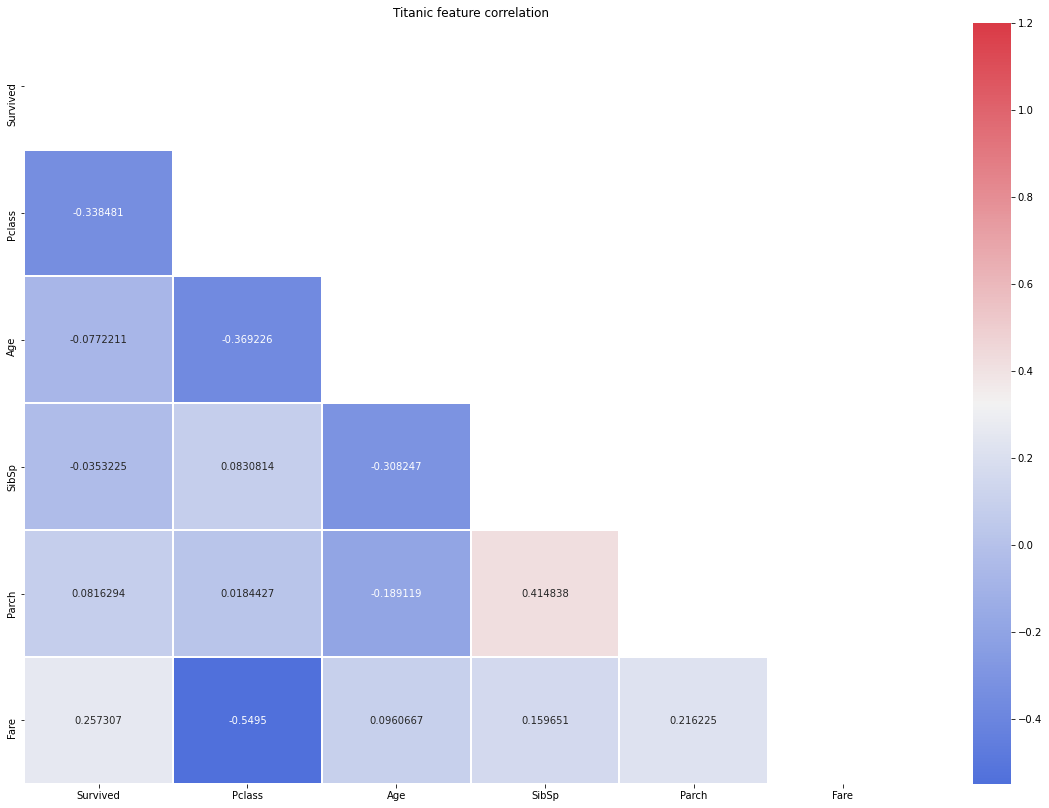

In [21]:
# Compute the correlation matrix to observe the correlation between pair of features

corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20,14))
plt.title("Titanic feature correlation")

# Generate a custom diveraging colourmap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='2g',linewidths=1);

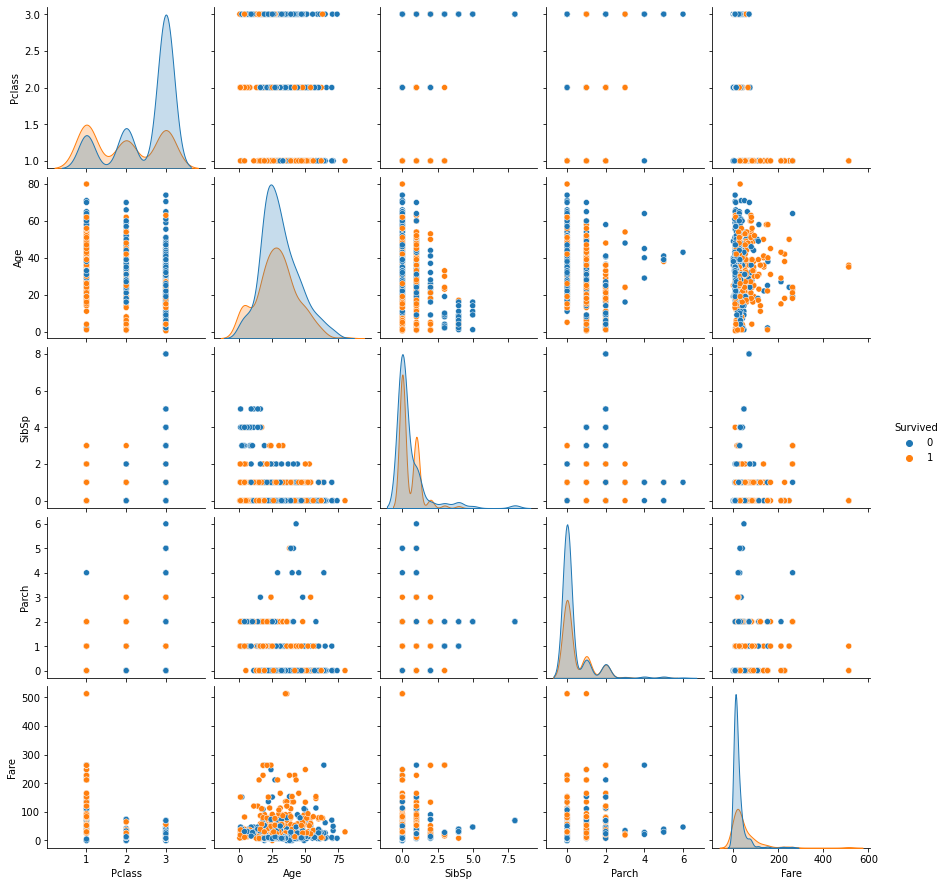

In [22]:
# Scatter plots of the first 10 "mean" features
sns.pairplot(all_df[list(all_df.columns[1:14]) + ['Survived']], hue = "Survived");

In [42]:
# Assign features to X
X = all_df.drop('Name', axis=1)
X = X.drop('Ticket', axis=1)
X = X.drop('Cabin', axis=1)
X = X.dropna()# drop missing data

# assign numeriscal label to y
y = X['Survived']
X = X.drop('Survived', axis=1)

# First , transform the class 'Sex' from thier original string representation (M and F ) into integers
# transform Embarked into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])
X['Embarked']= le.fit_transform(X['Embarked'])

X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


<AxesSubplot:>

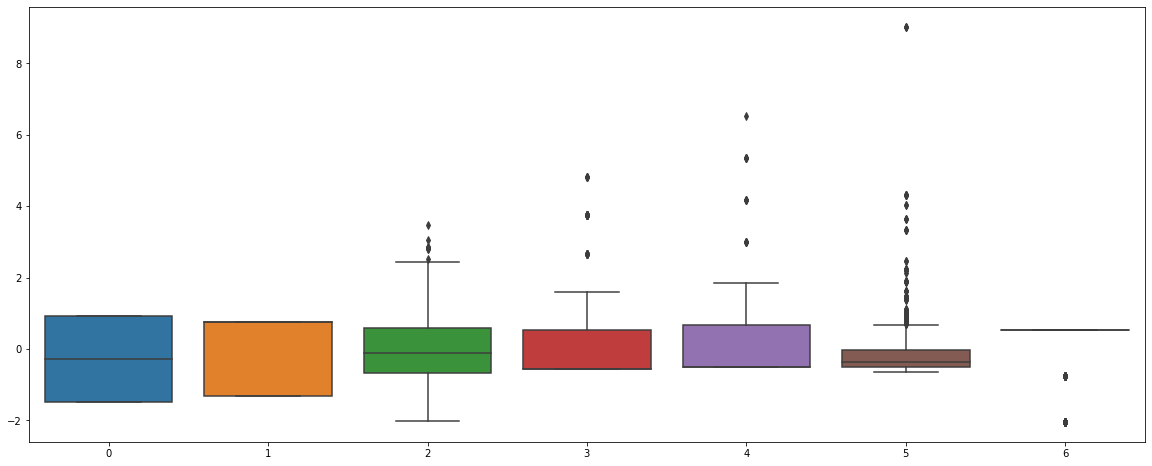

In [43]:
# Normalise the features to use zero mean normalisation
# Only for the first 10 features, but try yourself to visualise more features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs, ax=ax)

In [44]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.595506
std,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [46]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

feature_names = list(X.columns)
pca = PCA(n_components=7)
Xs_pca = pca.fit_transform(Xs)

In [47]:
# Only retain the first two nodes of PCA as the new features
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]

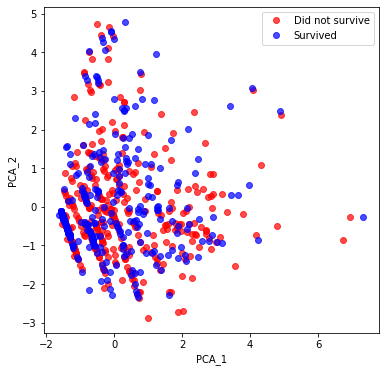

In [48]:
# Visualise the Malignant and benign using the PCA features
plt.figure(figsize=(6,6))
plt.plot(PCA_df['PCA_1'][all_df['Survived']==0], PCA_df['PCA_2'][all_df['Survived']==0], 'ro', alpha = 0.7)
plt.plot(PCA_df['PCA_1'][all_df['Survived']==1], PCA_df['PCA_2'][all_df['Survived']==1], 'bo', alpha = 0.7)

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Did not survive','Survived']);

In [78]:
# Then stratified sampling, Divide data into training and testing sets.
# Pay attention that we are using the normalised data value Xs rather than X 

#Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1, stratify=y)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from tqdm import tqdm_notebook as tqdm


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(Xs)
scoring = 'accuracy'
results = []
names = []
for name, model in tqdm(models):
    kf = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, Xs, y, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    
print('5-fold cross-validation accuracy score for the training data for all the classifiers')
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

<ipython-input-81-737b76129428>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, model in tqdm(models):



5-fold cross-validation accuracy score for the training data for all the classifiers
LR        : 0.793545 (0.018825)
LDA       : 0.785074 (0.033566)
KNN       : 0.797750 (0.027589)
CART      : 0.773924 (0.045193)
NB        : 0.785211 (0.034913)
SVM       : 0.829949 (0.046750)


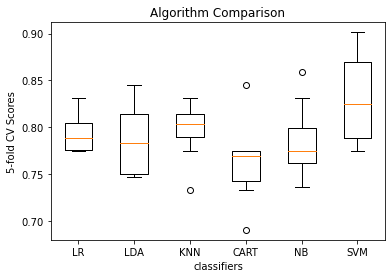

In [55]:
# Compare the algorithms 
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xlabel('classifiers')
plt.ylabel('5-fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names);

In [56]:
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs, y)

SVC(gamma='auto', probability=True)

In [77]:
# Now lets try k-fold cross validation
# Get average of 5-fold cross-validation score using on SVM classifier.
# Please try different number of folds and observe the results

from sklearn.model_selection import cross_val_score
n_folds = 9
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = np.average(cross_val_score(clf_cv, Xs, y, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:2f}'.format(n_folds,cv_error))

The 9-fold cross-validation accuracy score for this classifier is 0.823013


In [71]:
# Now lets try classification with some selected features, not all features
# with 3 features, the classification accuracy is not good 84%
# try to include more features and observe

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Model with just 3 best features selected (k=3)

clf_fs_cv = Pipeline([('feature_selctor', SelectKBest(f_classif, k=7)),
                      ('svc', SVC(C=1.0, kernel='rbf', gamma='auto', probability=True))])

scores = cross_val_score(clf_fs_cv, Xs, y, cv=9) #5 folds

print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

[0.8375     0.79746835 0.82278481 0.83544304 0.7721519  0.82278481
 0.78481013 0.87341772 0.86075949]
Average score and standard deviation: (82.30 +- 1.056)%


In [1]:
# We use confusion matrix (TP, TN, FP, FN) to visualise the performance

from sklearn.metrics import confusion_matrix, classification_report
X_test = pd.read_csv('C:/Users/rosco/OneDrive/Documents(one)/Kaggle/Titanic_comp/test.csv', index_col=False)
y_test = X_test['Survived']
y_pred = clf.fit(Xs, y).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

NameError: name 'pd' is not defined

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       127
           1       0.83      0.66      0.73        87

    accuracy                           0.80       214
   macro avg       0.81      0.78      0.79       214
weighted avg       0.81      0.80      0.80       214



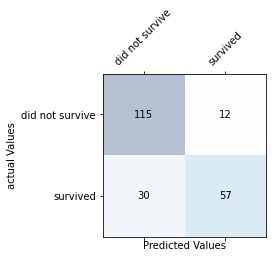

In [74]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["did not survive", "survived"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test, y_pred))

<ipython-input-75-5e514591c564>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1);


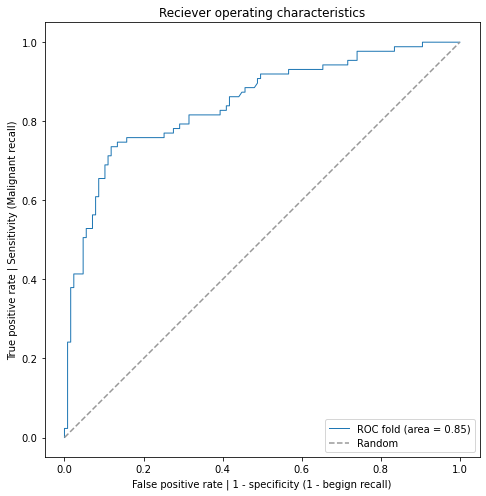

In [75]:
# Plot the rciever opertaing characteristic curve (ROC)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);